In [2]:
!pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lettura dei dataset


In [4]:
trdata = pd.read_csv("train.csv")
tedata = pd.read_csv("test.csv")

# Controllo dei valori nulli

Il primo lavoro da realizzare è il controllo dei valori nulli, dato che un singolo valore nullo può far crashare tutto il codice.

In [5]:
print(trdata.isnull().sum())
print(tedata.isnull().sum())

Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64
Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


# Breve descrizione del dataset

In [6]:
trdata.describe()

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,119.958115,0.287958,60.980806,0.450262,616.947644,0.397906,38.753927,0.329843,258454.075812,1.412147,136.523560,0.649215,0.308901,137.193717
std,69.266065,0.454002,11.730112,0.498828,983.283376,0.490752,12.265363,0.471392,95151.208042,1.032109,4.481332,0.478470,0.463254,78.306746
min,0.000000,0.000000,40.000000,0.000000,30.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,62.500000,0.000000,52.500000,0.000000,110.000000,0.000000,30.000000,0.000000,210500.000000,0.900000,134.000000,0.000000,0.000000,77.000000
50%,120.000000,0.000000,60.000000,0.000000,258.000000,0.000000,38.000000,0.000000,260000.000000,1.100000,137.000000,1.000000,0.000000,126.000000
75%,179.500000,1.000000,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,297500.000000,1.400000,139.000000,1.000000,1.000000,207.500000
max,238.000000,1.000000,94.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,285.000000


Possiamo vedere che nel training set, si hanno 70% dei valori che corrispondono alla classe 0 (non morto) e il restante 30% alla classe 1 (morto). Questo tipo di rapporto può creare problemi durante la classificazione.

In [7]:
trdata.DEATH_EVENT.value_counts(normalize=True)

0    0.712042
1    0.287958
Name: DEATH_EVENT, dtype: float64

# Feature Selection

<b>Heatmap:</b>
Per la feature selection ho deciso di utilizzare una heatmap. Il comando df.corr() dei DataFrame, ci permette di ottenere una matrice di correlazione NxN (dove N è il numero di features) dove viene applicata la correlazione di ogni feature con l'altra. Il risultato di questa operazione è stato poi graficato tramite una heatmap.
In questo modo ho deciso di utilizzare le feature che avessero un valore di correlazione con la feature Target maggiore di una soglia.

A questo punto quello ci interessa nella seguente Heatmap è il valore di correlazione delle colonne con la colonna <b>DEATH_EVENT</b>. 

La soglia che ho selezionato per la feature selection è stata: 

| corr[i][DEATH_EVENT.index] | >= 0.2

Ciò vuol dire che ogni correlazione dove il valore assoluto fosse maggiore o uguale a 0.2 avrebbe corrisposto alla selezione della feature.

Ciò quindi ci ha lasciato con le feature: 
- age
- ejection_fraction
- serum_creatinine
- serum_sodium
- time


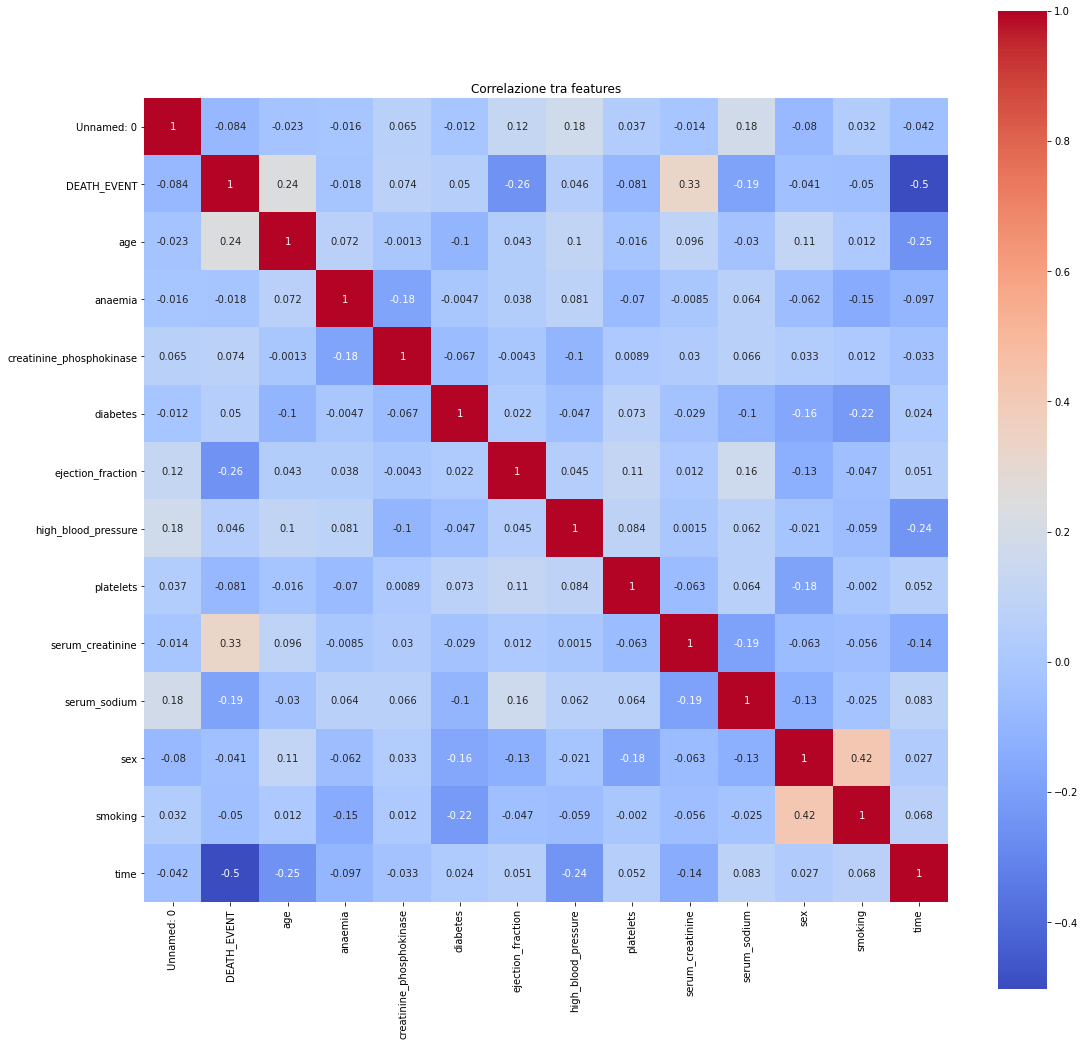

In [8]:
correlation = trdata.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlazione tra features')
plt.show()

In [9]:
features_utilizzate = ['time','ejection_fraction','serum_creatinine','age']

X_train = trdata[features_utilizzate]
y_train = trdata.DEATH_EVENT

X_test = tedata[features_utilizzate]
y_test = tedata.DEATH_EVENT

# Label Encoding

<b>age:</b> Per quanto riguarda l'età l'encoding è stato fatto raggruppando i valori in 4 gruppi diversi. Per la scelta dell'intervallo da utilizzare gruppo ho utilizzato la formula:

(MaxAge - MinAge)/4 = (95-40)/4 = 13.75 = 13

Quindi i 4 intervalli partono da 40, e contengono ognuno 14 numeri (estremi inclusi). Inoltre è stato assegnato un gruppo anche ai possibili valori x che potessero ricadere nell'intervallo: x<40 || x>95 in modo evitare problemi di esecuzione e visto che in ogni caso questi sarebbero valori outlier di bassa importanza,
I valori di massimo e minimo sono stati presi dal training set.

<b>ejection_fraction, time:</b> è stato realizzato un lavoro simile a quello di age, ma questa volta è stato fatto tramite la funzione cut.

<b>serum_sodium:</b> Questa feature è stata eliminata visto che dopo ripetute analisi e prove è stato verificato che ogni volta peggiorava il risultato. Questo anche provando diversi intervalli di codifica. 

<b>serum_creatinine</b> Dopo aver visto la distribuzione dei valori di questa feature, sia tramite il comando describe, sia tramite i grafici, questa è stata codificata tramite tre intervalli. Il primo tra 0.5 e 1, il secondo tra 1 e 2 e il terzo per ogni valore > 2 che sono i casi outlier.

In [10]:
Deaddata = trdata.loc[trdata['DEATH_EVENT']==1]
Alivedata = trdata.loc[trdata['DEATH_EVENT']==0]

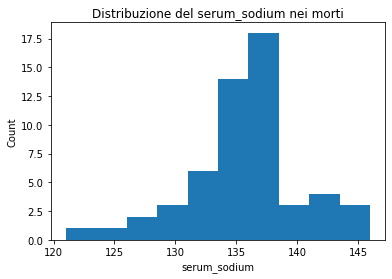

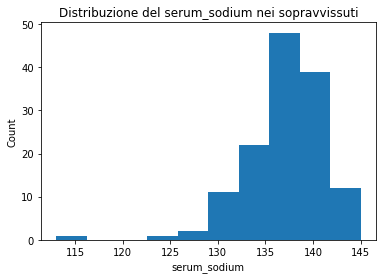

In [11]:
plt.hist(Deaddata['serum_sodium'])
plt.xlabel('serum_sodium')
plt.ylabel('Count')
plt.title('Distribuzione del serum_sodium nei morti')
plt.show()

plt.hist(Alivedata['serum_sodium'])
plt.xlabel('serum_sodium')
plt.ylabel('Count')
plt.title('Distribuzione del serum_sodium nei sopravvissuti')
plt.show()

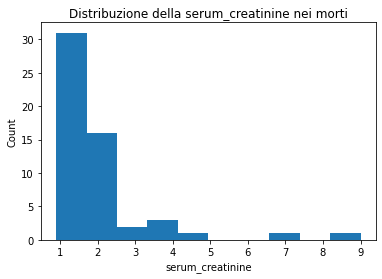

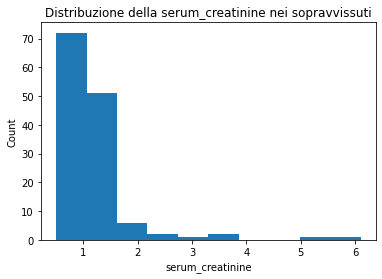

In [12]:
plt.hist(Deaddata['serum_creatinine'])
plt.xlabel('serum_creatinine')
plt.ylabel('Count')
plt.title('Distribuzione della serum_creatinine nei morti')
plt.show()

plt.hist(Alivedata['serum_creatinine'])
plt.xlabel('serum_creatinine')
plt.ylabel('Count')
plt.title('Distribuzione della serum_creatinine nei sopravvissuti')
plt.show()

In [13]:
trdata.age.describe()

count    191.000000
mean      60.980806
std       11.730112
min       40.000000
25%       52.500000
50%       60.000000
75%       69.000000
max       94.000000
Name: age, dtype: float64

In [14]:
def codifica_eta(dataset):
    dataset= dataset.copy()
    age = np.asanyarray(dataset['age'])
    for i in range(0, age.size):
        if 40 <= age[i] <= 53:
            age[i] = 0
        elif 54 <= age[i] <= 67:
            age[i] = 1
        elif 68 <= age[i] <= 81:
            age[i] = 2
        elif 82 <= age[i] <= 95:
            age[i] = 3
        else:
            age[i] = 4
            
    dataset['age'] = pd.DataFrame(age)
    return dataset

def codifica_creatinine(dataset):
    dataset= dataset.copy()
    cre = np.asanyarray(dataset['serum_creatinine'])
    for i in range(0, cre.size):
        if 0 <= cre[i] <= 1:
            cre[i] = 0
        elif 1 < cre[i] <= 2:
            cre[i] = 1
        else:
            cre[i] = 2
            
    dataset['serum_creatinine'] = pd.DataFrame(cre)
    return dataset


X_train = codifica_eta(X_train)
X_test = codifica_eta(X_test)


X_train = codifica_creatinine(X_train)
X_test = codifica_creatinine(X_test)

X_train['time'] = pd.cut(X_train['time'], bins=4, labels=np.arange(4), right=False)
X_test['time'] = pd.cut(X_test['time'], bins=4, labels=np.arange(4), right=False)

X_train['ejection_fraction'] = pd.cut(X_train['ejection_fraction'], bins=4, labels=np.arange(4), right=False)
X_test['ejection_fraction'] = pd.cut(X_test['ejection_fraction'], bins=4, labels=np.arange(4), right=False)

# Modello e Risultati

Per quanto riguarda il modello di classificazione è stato utilizzato un Decision Tree. Si è deciso di limitare il numero di foglie da costruire visto che altrimenti questo non si ferma e va in overfitting. 

Per quanto riguarda i risultati ottenuti nella matrice di confusione, questi purtroppo variano ogni qual volta si cambia il training set. In generale l'accuracy ottenuto sulla label 0 è quella che oscilla di più variando tra risultati compresi tra 65% e 100%. Queste variazioni molto probabilmente derivano dalla poca quantità di data points che si hanno. Questo fa in modo che ogni volta che si cambia il training set cambi anche la funzione stimata durante la fase di training, la quale a volte si avvicina di più alla "true function" e a volte si allontana di più.   

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_leaf_nodes=6,random_state=8, criterion='entropy')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test, prediction))

Accuracy: 0.9583333333333334


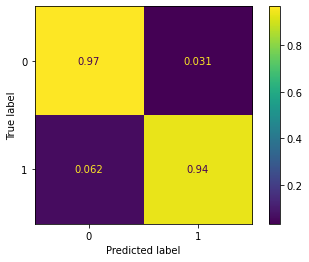

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test,y_test,normalize='true')